In [2]:
import numpy as np
import pandas as pd
from lightkurve import KeplerTargetPixelFile
import csv
from tqdm import tqdm
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import itertools
from sklearn.metrics import classification_report

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# I will create my own dataset that is more indicative of the data at hand.

In [5]:
# columns I want:
# 1. Kepler ID = index
# 2. Minimum(flux)
# 3. Maximum(flux)
# 4. Delta
# 5. first percentile of flux
# 6. 3rd percentile of flux
# 7. 5th percentile of flux
# 8. Target label

In [6]:
xtrain = np.load('xtrainfile2.npy')
xtest = np.load('xtestfile2.npy')

In [7]:
ytrain = np.load('ytrainfile3.npy')
ytest = np.load('ytestfile3.npy')

In [8]:
print(xtest.shape)
print(xtrain.shape)
print(ytrain.shape)
print(ytest.shape)

(2160, 1626)
(5725, 1626)
(5727,)
(2161,)


In [9]:
# find the minimum value for each vector
# put it in a list

minimum = []
for i in range(len(xtrain)):
    minimum.append(np.amin(xtrain[i]))
for i in range(len(xtest)):
    minimum.append(np.amin(xtest[i]))

In [10]:
# find the maximum value for each vector
# put it in a list

maximum = []
for i in range(len(xtrain)):
    maximum.append(np.amax(xtrain[i]))
for i in range(len(xtest)):
    maximum.append(np.amax(xtest[i]))

In [11]:
# find the first percentile
# put it all in a list

first = []
for i in range(len(xtrain)):
    first.append(np.percentile(xtrain[i], 1))
for i in range(len(xtest)):
    first.append(np.percentile(xtest[i], 1))

In [12]:
# find the third percentile
# put it all in a list

third = []
for i in range(len(xtrain)):
    third.append(np.percentile(xtrain[i], 3))
for i in range(len(xtest)):
    third.append(np.percentile(xtest[i], 3))

In [13]:
# find the 5th percentile
# put it all in a list

fifth = []
for i in range(len(xtrain)):
    fifth.append(np.percentile(xtrain[i], 5))
for i in range(len(xtest)):
    fifth.append(np.percentile(xtest[i], 5))

In [14]:
# create delta between min and max
delta = []
for i in range(len(xtrain)):
    delta.append(maximum[i]-minimum[i])
for i in range(len(xtest)):
    delta.append(maximum[i]-minimum[i])

In [15]:
ytest

array([0. , 0. , 0.5, ..., 0.5, 0. , 0. ])

In [16]:
# create target values
target = []
for i in range(len(xtrain)):
    target.append(ytrain[i])
for i in range(len(xtest)):
    target.append(ytest[i])

In [17]:
df = pd.DataFrame({'minimum': minimum,
                   'maximum': maximum,
                   'delta': delta,
                   'firstpercent': first,
                   'thirdpercent': third,
                   'fifthpercent': fifth,
                   'target': target})

In [125]:
len(df)

7885

# Create Training and Test Sets

In [19]:
df['target'] = (df["target"] == 0.5)

In [20]:
df.head(50)

,delta,fifthpercent,firstpercent,maximum,minimum,target,thirdpercent
0,0.004157,0.999170,0.998773,1.002296,0.998139,True,0.999048
1,0.004157,0.999170,0.998773,1.002296,0.998139,True,0.999048
2,0.021173,0.995924,0.994854,1.006699,0.985526,False,0.995604
3,0.020493,0.998810,0.992693,1.012022,0.991529,False,0.996204
4,0.003358,0.999801,0.999660,1.002780,0.999422,False,0.999757
5,0.016990,0.999027,0.998136,1.011780,0.994790,True,0.998838
6,0.015097,1.000090,0.987409,1.001118,0.986021,True,0.998452
7,0.007174,0.994633,0.993714,1.000743,0.993569,True,0.993983
8,0.013041,0.999538,0.991328,1.003709,0.990669,True,0.995176
9,0.003097,0.999817,0.999723,1.002409,0.999312,True,0.999789


In [21]:
x = df.drop(['target'], axis=1)
y = df['target']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40, stratify=y)

# Fixing Class Imbalance

In [21]:
train_majority = (y_train==False)
train_majority.value_counts()

True     3005
False    2908
Name: target, dtype: int64

In [22]:
# its actually fine

# Function to Plot Confusion Matrices

In [73]:
def predict_with_cutoff(y_prob, threshold):
    y_pred = [True if x >= threshold else False for x in y_prob]
    return y_pred

In [96]:
predict_with_cutoff(y_pred_probo, 0.2)

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [33]:
# define a function to draw beautiful confusion matrix!

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Reds):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Modeling
### Random Forest

### Fine-tuning Random Forest parameters

In [25]:
from sklearn.grid_search import GridSearchCV
 
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [49, 50, 51, 52],
           "max_depth" : [14, 15, 16, 17, 18]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 15, 'n_estimators': 51}


### Fitting Random Forest

In [236]:
# Fit a Random Forest Model to the dataset

randomforest = RandomForestClassifier(class_weight = 'balanced', max_depth=15, n_estimators=51, random_state=76)
randomforest.fit(x_train, y_train)

#y_pred_proba = randomforest.predict_proba(x_test)[:,1]
#threshold = 0.4
#y_cutoff = np.where(y_pred_proba >= threshold, 1, 0)
y_pred = randomforest.predict(x_test)

In [237]:
y_pred

array([ True,  True,  True, ...,  True, False,  True])

In [27]:
# Print a nice little score card for this model

print("Model accuracy: {:.2f}%".format(randomforest.score(x_test, y_test)*100))
print("Model F1 Score: {:.2f}".format(metrics.f1_score(y_pred, y_test)))
#print(metrics.classification_report(y1test, randomforest.predict(x1test_norm)))
print(metrics.classification_report(y_test, y_pred))

Model accuracy: 66.13%
Model F1 Score: 0.69
             precision    recall  f1-score   support

      False       0.71      0.57      0.63      1002
       True       0.63      0.76      0.69       970

avg / total       0.67      0.66      0.66      1972



AREA UNDER CURVE: 0.7222668065929996


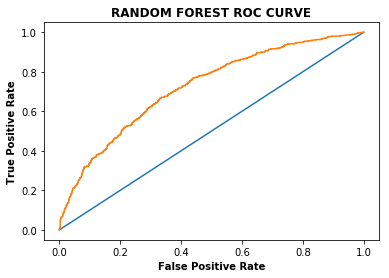

In [28]:
# Plot the ROC Curve and print the AUC

y_score=randomforest.predict_proba(x_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title("RANDOM FOREST ROC CURVE", fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
print("AREA UNDER CURVE: "+str(roc_auc));

[[570 432]
 [236 734]]


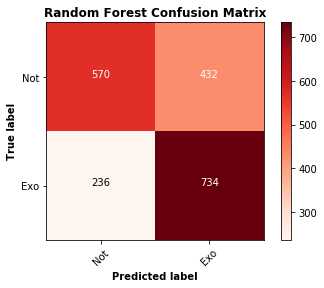

In [29]:
# Print a lovely confusion matrix

plt.tight_layout()
plt.title("Random Forest Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred), ['Not', 'Exo'])

# Modeling
### Logistic Regression

In [73]:
# fit a logistic regression model, print the f1 score

logistic = LogisticRegression(penalty='l2', 
                              dual=True, 
                              tol=0.0001, 
                              C=200.0, 
                              fit_intercept=True, 
                              intercept_scaling=1, 
                              class_weight='balanced', 
                              random_state=135, 
                              solver='liblinear', 
                              max_iter=100, 
                              multi_class='ovr', 
                              verbose=0, warm_start=False, n_jobs=1)
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)
y_pred_proba = logistic.predict_proba(x_test)

In [76]:
y_pred_prob = []
for i in range(len(y_pred_proba)):
    y_pred_prob.append(y_pred_proba[i][1])

In [77]:
y_pred_prob

[0.27878647150395214,
 0.2759648170421637,
 0.28010823138024304,
 0.27198427050973656,
 0.2704117527711117,
 0.28656222306416007,
 0.19428376905781986,
 0.267360550571746,
 0.26458096585308893,
 0.2664228866950053,
 0.2853024589573475,
 0.2779639552760565,
 0.2720520727695656,
 0.2857110428874079,
 0.2829693129438141,
 0.2832764239460605,
 0.25752910119784456,
 0.26007120970139386,
 0.2717794022266539,
 0.19024365155927725,
 0.005080328417697527,
 0.28384308329043134,
 0.19542686364165343,
 0.17686614924100708,
 0.2638150213987276,
 0.2875006395970823,
 0.2603232975153991,
 0.2667373154822439,
 0.28651997536893675,
 0.258314840966214,
 0.1436056879865216,
 0.2645558203340537,
 0.17517934903334084,
 0.2544019251385747,
 0.2618276554030271,
 2.502996277365523e-06,
 0.28032600446742434,
 0.18200133324012763,
 0.2841556922878776,
 0.273622628821852,
 0.2629342099913881,
 0.24297965671475955,
 0.28574659337433916,
 0.27761780869658687,
 0.2742813494977597,
 0.27896492958028746,
 0.255220113

In [84]:
# Print a nice little score card for this model
# do you need to normalize?

print("Model accuracy: {:.2f}%".format(logistic.score(x_train, y_train)*100))
print("Model F1 Score: {:.2f}".format(metrics.f1_score(y_pred, y_test)))
print(metrics.classification_report(y_test, logistic.predict(x_test)))

Model accuracy: 50.82%
Model F1 Score: 0.00
             precision    recall  f1-score   support

      False       0.51      1.00      0.67      1002
       True       0.00      0.00      0.00       970

avg / total       0.26      0.51      0.34      1972



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AREA UNDER CURVE: 0.5678925653846945


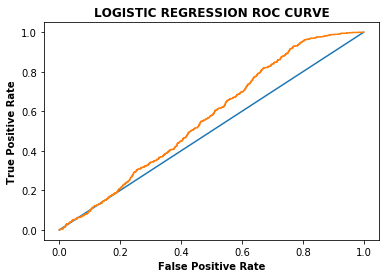

In [32]:
# Plot ROC Curve and print AUC

y_score=logistic.predict_proba(x_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title("LOGISTIC REGRESSION ROC CURVE", fontweight="bold")
plt.xlabel('False Positive Rate', fontweight="bold")
plt.ylabel('True Positive Rate', fontweight='bold')
print("AREA UNDER CURVE: "+str(roc_auc));

In [108]:
yhat = predict_with_cutoff(y_pred_prob, 0.24)
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

      False       0.77      0.23      0.35      1002
       True       0.54      0.93      0.68       970

avg / total       0.66      0.57      0.51      1972



[[226 776]
 [ 68 902]]


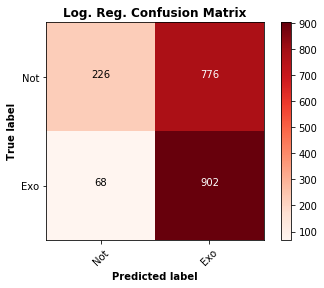

In [109]:
plt.tight_layout()
plt.title("Log. Reg. Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight="bold")
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test,yhat), ['Not', 'Exo'])

[[1002    0]
 [ 970    0]]


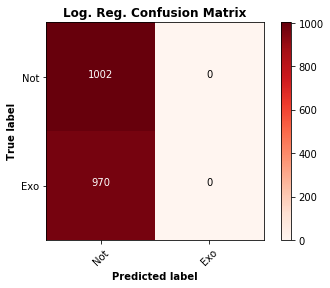

In [33]:
# Print a lovely confusion matrix

plt.tight_layout()
plt.title("Log. Reg. Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight="bold")
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred), ['Not', 'Exo'])

In [110]:
exo_pred = []
for i,j in enumerate(y_pred_prob):
    if j > 0.24:
        exo_pred.append(i)

In [120]:
df2 = df.loc[exo_pred]

In [123]:
df2 = df2.reset_index(drop=True)
x1 = df2.drop(['target'], axis=1)
y1 = df2['target']

In [125]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.25, random_state=40, stratify=y1)

In [126]:
logistic = LogisticRegression(penalty='l2', 
                              dual=True, 
                              tol=0.0001, 
                              C=200.0, 
                              fit_intercept=True, 
                              intercept_scaling=1, 
                              class_weight='balanced', 
                              random_state=135, 
                              solver='liblinear', 
                              max_iter=100, 
                              multi_class='ovr', 
                              verbose=0, warm_start=False, n_jobs=1)
logistic.fit(x_train1,y_train1)
y_pred1 = logistic.predict(x_test1)
y_pred_proba1 = logistic.predict_proba(x_test1)

In [127]:
print("Model accuracy: {:.2f}%".format(logistic.score(x_train1, y_train1)*100))
print("Model F1 Score: {:.2f}".format(metrics.f1_score(y_pred1, y_test1)))
print(metrics.classification_report(y_test1, logistic.predict(x_test1)))

Model accuracy: 78.14%
Model F1 Score: 0.88
             precision    recall  f1-score   support

      False       0.88      0.07      0.13        96
       True       0.78      1.00      0.88       324

avg / total       0.80      0.79      0.71       420



In [128]:
y_pred_proba1

array([[0.12557812, 0.87442188],
       [0.14523933, 0.85476067],
       [0.12596572, 0.87403428],
       [0.12474693, 0.87525307],
       [0.13769085, 0.86230915],
       [0.15949334, 0.84050666],
       [0.12025159, 0.87974841],
       [0.13404756, 0.86595244],
       [0.12671126, 0.87328874],
       [0.12130661, 0.87869339],
       [0.13423861, 0.86576139],
       [0.13639213, 0.86360787],
       [0.15343497, 0.84656503],
       [0.21952577, 0.78047423],
       [0.12220595, 0.87779405],
       [0.27486719, 0.72513281],
       [0.14050061, 0.85949939],
       [0.16014273, 0.83985727],
       [0.19496262, 0.80503738],
       [0.12342377, 0.87657623],
       [0.13697135, 0.86302865],
       [0.12267259, 0.87732741],
       [0.17255105, 0.82744895],
       [0.12192849, 0.87807151],
       [0.22457622, 0.77542378],
       [0.1294021 , 0.8705979 ],
       [0.12393648, 0.87606352],
       [0.14051152, 0.85948848],
       [0.15074524, 0.84925476],
       [0.36260125, 0.63739875],
       [0.

In [135]:
y_pred_proba = []
for i in range(len(y_pred_proba1)):
    y_pred_proba.append(y_pred_proba1[i][1])

In [149]:
yhat = predict_with_cutoff(y_pred_proba, 0.83)
print(classification_report(y_test1, yhat))

             precision    recall  f1-score   support

      False       0.53      0.33      0.41        96
       True       0.82      0.91      0.87       324

avg / total       0.76      0.78      0.76       420



[[ 32  64]
 [ 28 296]]


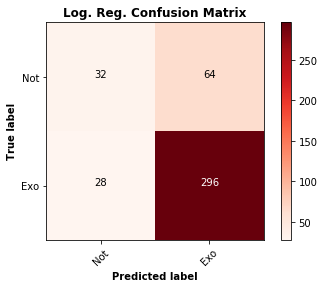

In [150]:
plt.tight_layout()
plt.title("Log. Reg. Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight="bold")
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test1,yhat), ['Not', 'Exo'])

In [ ]:
# shrinking our universe!

## Aggregated multi-layer logistic regression

In [175]:
exo_pred[2]

2

In [198]:
exo_dict.keys()

dict_keys([2472, 2210, 3438, 3332, 5716, 1304, 7749, 4664, 3566, 4845, 4770, 2973, 5718, 7722, 3253, 2355, 1890, 7496, 973, 6919, 5570, 6443, 2994, 6824, 3231, 3905, 1640, 4115, 572, 3409, 3970, 2757, 3894, 3392, 1077, 950, 435, 547, 5460, 7154, 331, 4227, 6575, 5315, 4888, 4256, 1476, 6571, 1023, 4933, 3408, 3403, 1134, 6820, 6097, 4059, 2023, 4853, 3108, 3981, 4150, 7029, 867, 5031, 7882, 2254, 2523, 4250, 643, 7565, 5719, 2408, 1376, 937, 7880, 3732, 634, 2083, 6222, 5654, 6869, 4817, 1266, 3829, 7528, 6535, 1932, 275, 6429, 3696, 2094, 761, 381, 1936, 6846, 413, 7324, 6829, 3141, 4271, 3032, 5159, 7188, 1316, 131, 1301, 2639, 7407, 5840, 7131, 5358, 2765, 1235, 6384, 4585, 4394, 201, 5220, 3353, 599, 4400, 6145, 6258, 332, 6622, 4830, 6152, 224, 2880, 726, 1214, 6233, 415, 5133, 7550, 6213, 7282, 6285, 5010, 763, 3225, 7571, 74, 4069, 3528, 5534, 1039, 5223, 2650, 5545, 4306, 2373, 7626, 4892, 1074, 891, 4351, 7095, 6074, 206, 7295, 4909, 3536, 6598, 1693, 4695, 4553, 5434, 2068, 5

In [205]:
logistic1 = LogisticRegression(class_weight='balanced', 
                               random_state=135, 
                               verbose=0)


logistic1.fit(x_train,y_train)
y_pred1 = logistic1.predict(x_test)
ypredictproba1 = logistic1.predict_proba(x_test)
#ypredictproba1 = ypredictproba1[1]


logreg_exo_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict > 0.25:
        logreg_exo_dict[x_test.index[i]] = ytestpredict

        
        
logreg_non_exo_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict <= 0.25:
        logreg_non_exo_dict[x_test.index[i]] = ytestpredict

        
        
##############################################################
# Create second Layer's dataframe
        
df2 = df.loc[logreg_exo_dict.keys()]

#df2 = df2.reset_index(drop=True)
x2 = df2.drop(['target'], axis=1)
y2 = df2['target']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=40, stratify=y2)


#############################################################
# Fit second Layer

logistic2 = LogisticRegression(class_weight='balanced', 
                               random_state=135)

logistic2.fit(x_train2,y_train2)
y_pred2 = logistic2.predict(x_test2)
ypredictproba2 = logistic2.predict_proba(x_test2)



logreg_exo_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict > 0.485:
        logreg_exo_dict2[y_test2.index[i]] = ytestpredict


logreg_non_exo_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict <= 0.485:
        logreg_non_exo_dict2[y_test2.index[i]] = ytestpredict
        


#print(classification_report(y_test2, yhat))
#plot_confusion_matrix(metrics.confusion_matrix(y_test2,yhat), ['Not', 'Exo'])

In [214]:
def ensemble(y_test):
    y_ens = []
    for i in range(len(y_test)):
        if y_test.index[i] in logreg_non_exo_dict2.keys():
            y_ens.append(False)
        else:
            if y_test.index[i] in logreg_exo_dict2.keys():
                y_ens.append(True)
            else:
                if y_test.index[i] in logreg_non_exo_dict.keys():
                    y_ens.append(False)
                else:
                    if y_test.index[i] in logreg_exo_dict.keys():
                        y_ens.append(True)
    return y_ens

In [222]:
(ensemble(y_test)).dtype

AttributeError: 'list' object has no attribute 'dtype'

In [225]:
y_test_list = list(y_test)

[[ 78 924]
 [  9 961]]


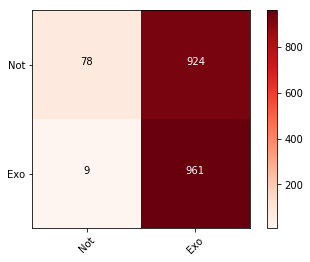

In [235]:
plot_confusion_matrix(metrics.confusion_matrix(y_test_list,ensemble(y_test)),['Not', 'Exo'])
#plot_confusion_matrix(metrics.confusion_matrix(y_test1,yhat), ['Not', 'Exo'])

# Modeling
### Decision Tree

In [34]:
from sklearn.grid_search import GridSearchCV
 
dtc = DecisionTreeClassifier(splitter='best') 
 
# Use a grid over parameters of interest
param_grid = { "max_depth" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]}
 
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 10)
CV_dtc.fit(x_train, y_train)
print(CV_dtc.best_params_)

{'max_depth': 8}


In [35]:
# Fit a Decision Tree model to the data, with max_depth=60

decisiontree = DecisionTreeClassifier(class_weight = 'balanced', max_depth=8)
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)


In [71]:
#y_pred_prob = decisiontree.predict_proba(x_test)
#yhat = predict_with_cutoff(y_pred_prob, 0.49)
#print(classification_report(y_test, yhat))
#print(scores)

[[435 567]
 [206 764]]


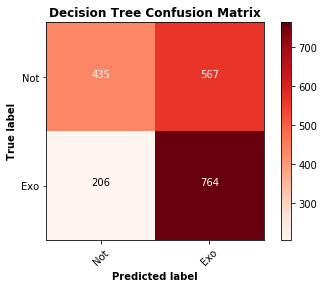

In [72]:
# Print a lovely confusion matrix

plt.tight_layout()
plt.title("Decision Tree Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred), ['Not', 'Exo'])

In [36]:
# Print a nice little score card for this model

print("Model accuracy: {:.2f}%".format(decisiontree.score(x_test, y_test)*100))
print("Model F1 Score: {:.2f}".format(metrics.f1_score(y_pred, y_test)))
print(metrics.classification_report(y_test, decisiontree.predict(x_test)))

Model accuracy: 60.80%
Model F1 Score: 0.66
             precision    recall  f1-score   support

      False       0.68      0.43      0.53      1002
       True       0.57      0.79      0.66       970

avg / total       0.63      0.61      0.60      1972



AREA UNDER CURVE: 0.6263354733831307


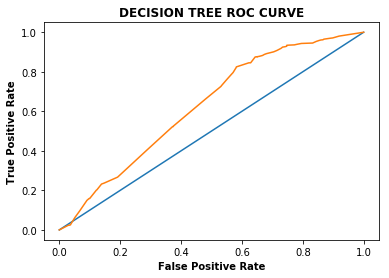

In [37]:
# Plot the ROC Curve and print AUC

y_score=decisiontree.predict_proba(x_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title("DECISION TREE ROC CURVE", fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
print("AREA UNDER CURVE: "+str(roc_auc));

## Aggregated Multi-layer Decision Tree

In [ ]:
decisiontree1 = DecisionTreeClassifier(class_weight = 'balanced', max_depth=8)
decisiontree1.fit(x_train, y_train)
y_pred1 = decisiontree.predict_proba(x_test)

# Modeling
### Keras with new features

In [39]:
from __future__ import division

import numpy as np
import os
import tempfile
import keras
from keras import backend as K
import tensorflow as tf

np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
x_train_np = np.array(x_train).reshape(5913, 1, 6)

In [41]:
y_train_np = np.array(y_train).reshape(5913, 1)

In [42]:
x_test_np = np.array(x_test).reshape(1972, 1, 6)

In [43]:
y_test_np = np.array(y_test).reshape(1972, 1)

- Test for correct backend

In [44]:
if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the TensorFlow backend,'
                       ' because it requires the Datset API, which is not'
                       ' supported on other platforms.')

- Construct model

In [45]:
# from the keras tutorial:

# Keras 1D convolution!!!!!

model3 = Sequential()

model3.add(Dense(6, input_shape=(1,6), activation='sigmoid'))

model3.add(Flatten())

model3.add(Dense(5, activation='linear'))

model3.add(Dense(4, activation='linear'))

model3.add(Dense(3, activation='linear')) # probably want linear or relu?

#model.add(Dropout(0.25))

model3.add(Dense(1, activation='sigmoid')) # or sigmoid? which is more standard

- Visualization: shows each layer in the model, and its output

In [46]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 6)              42        
_________________________________________________________________
flatten_1 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [47]:
## from the online resource (to get a decaying learning rate)

# Compile model
#epochs = 10
#learning_rate = 0.01
#decay_rate = learning_rate / epochs
#momentum = 0.8
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- Train the model

In [48]:
# Fit the model
model3.fit(x_train_np, y_train_np, epochs=10, batch_size=28, validation_data=(x_test_np, y_test_np))

Train on 5913 samples, validate on 1972 samples
Epoch 1/10
5913/5913 [==============================] - 1s 112us/step - loss: 0.6932 - acc: 0.5079 - val_loss: 0.6954 - val_acc: 0.5081
Epoch 2/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6934 - acc: 0.5021 - val_loss: 0.6933 - val_acc: 0.4919
Epoch 3/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6932 - acc: 0.5065 - val_loss: 0.6929 - val_acc: 0.5411
Epoch 4/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6931 - acc: 0.5087 - val_loss: 0.6929 - val_acc: 0.5081
Epoch 5/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6930 - acc: 0.5038 - val_loss: 0.6928 - val_acc: 0.5208
Epoch 6/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6929 - acc: 0.5075 - val_loss: 0.6924 - val_acc: 0.5081
Epoch 7/10
5913/5913 [==============================] - 0s 59us/step - loss: 0.6927 - acc: 0.5123 - val_loss: 0.6923 - val_acc: 0.5081
Epoch 

- Evaluate the model on test data

In [49]:
model3.evaluate(x_test_np, y_test_np, verbose=True)
y_prob_np = model3.predict_proba(x_test_np)

1972/1972 [==============================] - 0s 23us/step


In [51]:
# Final evaluation of the model
scores = model3.evaluate(x_test_np, y_test_np, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_prob_np = model3.predict_proba(x_test_np)
yhat = predict_with_cutoff(y_prob_np, 0.4734)
print(classification_report(y_test_np, yhat))
print(scores)

Accuracy: 50.81%
             precision    recall  f1-score   support

      False       0.55      0.52      0.54      1002
       True       0.53      0.56      0.55       970

avg / total       0.54      0.54      0.54      1972

[0.6921968677706457, 0.5081135903241426]


[[523 479]
 [424 546]]


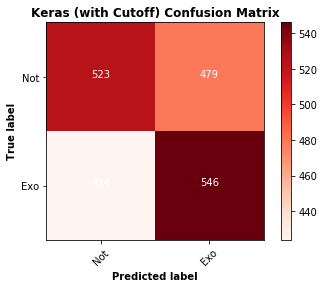

In [52]:
plt.tight_layout()
plt.title("Keras (with Cutoff) Confusion Matrix", fontweight='bold')
plt.ylabel('True label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(metrics.confusion_matrix(y_test_np,yhat), ['Not', 'Exo'])

# Aggregating a Random Forest with Random Forest

             precision    recall  f1-score   support

      False       0.41      0.22      0.29       108
       True       0.64      0.82      0.72       184

avg / total       0.56      0.60      0.56       292

[[ 24  84]
 [ 34 150]]


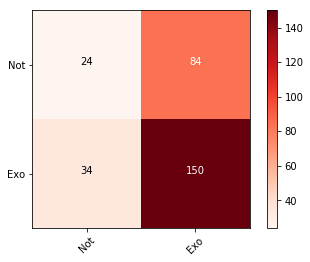

In [311]:
randomforest1 = RandomForestClassifier(class_weight = 'balanced', max_depth=15, n_estimators=51, random_state=76)
randomforest1.fit(x_train, y_train)

y_pred1 = randomforest1.predict(x_test)
ypredictproba1 = randomforest1.predict_proba(x_test)
#ypredictproba1 = ypredictproba1[1]


exo_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict > 0.5:
        exo_dict[x_test.index[i]] = True

        
        
aggregated_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict <= 0.5:
        aggregated_dict[x_test.index[i]] = False

        
        
##############################################################
# Create second Layer's dataframe
        
df2 = df.loc[exo_dict.keys()]

#df2 = df2.reset_index(drop=True)
x2 = df2.drop(['target'], axis=1)
y2 = df2['target']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=40, stratify=y2)


#############################################################
# Fit second Layer


randomforest2 = RandomForestClassifier(class_weight = 'balanced', max_depth=18, n_estimators=21, random_state=76)

randomforest2.fit(x_train2,y_train2)
y_pred2 = randomforest2.predict(x_test2)
ypredictproba2 = randomforest2.predict_proba(x_test2)



aggregated_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict > 0.45:
        aggregated_dict2[y_test2.index[i]] = True


#non_exo_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict <= 0.45:
        aggregated_dict2[y_test2.index[i]] = False
        


aggregated_array = list(aggregated_dict2.values())
#print(classification_report(y_test2, yhat))
#plot_confusion_matrix(metrics.confusion_matrix(y_test2,yhat), ['Not', 'Exo'])



print(classification_report(y_test2,aggregated_array))
plot_confusion_matrix(metrics.confusion_matrix(y_test2,aggregated_array), ['Not', 'Exo'])


# Aggregating Random Forest with Decision Tree

             precision    recall  f1-score   support

      False       0.38      0.13      0.19       108
       True       0.63      0.88      0.73       184

avg / total       0.54      0.60      0.53       292

[[ 14  94]
 [ 23 161]]


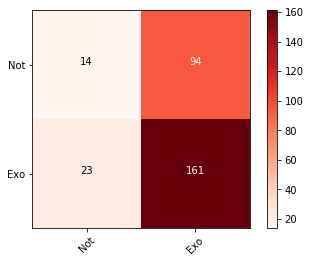

In [319]:
randomforest1 = RandomForestClassifier(class_weight = 'balanced', max_depth=15, n_estimators=51, random_state=76)
randomforest1.fit(x_train, y_train)

y_pred1 = randomforest1.predict(x_test)
ypredictproba1 = randomforest1.predict_proba(x_test)
#ypredictproba1 = ypredictproba1[1]


exo_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict > 0.5:
        exo_dict[x_test.index[i]] = True

        
        
aggregated_dict = {}
for i in range(len(y_test)):
    ytestpredict = ypredictproba1[i][1]
    if ytestpredict <= 0.5:
        aggregated_dict[x_test.index[i]] = False

        
        
##############################################################
# Create second Layer's dataframe
        
df2 = df.loc[exo_dict.keys()]

#df2 = df2.reset_index(drop=True)
x2 = df2.drop(['target'], axis=1)
y2 = df2['target']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=40, stratify=y2)


#############################################################
# Fit second Layer


decisiontree2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth=8, random_state=8)

decisiontree2.fit(x_train2,y_train2)
y_pred2 = decisiontree2.predict(x_test2)
ypredictproba2 = decisiontree2.predict_proba(x_test2)



aggregated_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict > 0.47:
        aggregated_dict2[y_test2.index[i]] = True


#non_exo_dict2 = {}
for i in range(len(y_test2)):
    ytestpredict = ypredictproba2[i][1]
    if ytestpredict <= 0.47:
        aggregated_dict2[y_test2.index[i]] = False
        


aggregated_array = list(aggregated_dict2.values())
#print(classification_report(y_test2, yhat))
#plot_confusion_matrix(metrics.confusion_matrix(y_test2,yhat), ['Not', 'Exo'])



print(classification_report(y_test2,aggregated_array))
plot_confusion_matrix(metrics.confusion_matrix(y_test2,aggregated_array), ['Not', 'Exo'])

AREA UNDER CURVE: 0.5685386473429952


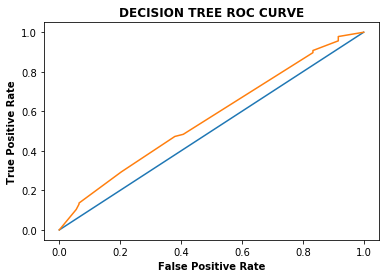

In [321]:
y_score=decisiontree2.predict_proba(x_test2)[:,1]

fpr, tpr,_ = roc_curve(y_test2, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title("DECISION TREE ROC CURVE", fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
print("AREA UNDER CURVE: "+str(roc_auc));